# Correlate topic mixtures from MixEHR with ventilation duration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/infer/infer_result.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [3]:
print(duration.shape)
print(mixtures.shape)

(4728,)
(4728, 50)


In [4]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.004113,0.993497,53.778068,92.739699,2.084227,55.262255,3.265762,127.114917,8.285883,42.947465,...,3.215692,0.778578,12.490008,4.982168,10.079525,3.227927,142.467938,5.921330,112.739102,127.943595
1,1.252700,3.047232,14.721221,15.688285,2.924715,53.197254,1.906736,17.913858,1.040189,70.917125,...,0.350375,1.107019,1.615780,0.791014,4.179296,0.826678,48.429811,14.599893,1.896193,244.183915
2,0.534748,0.930048,38.649539,2.823574,0.401094,15.344179,1.602273,44.824453,0.599308,371.707537,...,0.496951,0.643946,0.333555,0.383255,1.081912,0.394330,14.452990,4.090531,23.939253,24.206990
3,0.352494,0.793097,32.445131,10.331763,0.549328,67.307436,0.865146,46.170676,0.648309,30.181887,...,0.366266,0.700678,0.620353,0.540657,0.949045,0.520401,203.727477,2.250761,3.526607,71.015511
4,0.597239,0.709514,38.843553,49.953473,1.315904,40.232045,49.813754,112.421580,1.037370,36.946529,...,3.910892,7.313523,0.817121,3.109757,2.107193,2.914996,386.747226,4.983144,18.794002,218.690311


In [5]:
duration.head()

0     83.733333
1    118.333333
2     82.666667
3    166.000000
4     69.000000
Name: 1, dtype: float64

## Normalize

In [6]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [7]:
mixtures.sum(axis=1)

0        1169.0
1         868.0
2         677.0
3         918.0
4        1890.0
         ...   
4723    18362.0
4724     5134.0
4725     1981.0
4726    10245.0
4727     9172.0
Length: 4728, dtype: float64

## See if mixture's rows sum up to 1

In [8]:
normed_mixtures.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4723    1.0
4724    1.0
4725    1.0
4726    1.0
4727    1.0
Length: 4728, dtype: float64

## Heatmap

In [9]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.046082,0.079468,0.001786,0.047354,0.002798,0.108924,0.007100,0.036802,0.000561,0.001818,...,0.002756,0.000667,0.010703,0.004269,0.008637,0.002766,0.122080,0.005074,0.096606,0.109634
1,0.017044,0.018164,0.003386,0.061592,0.002208,0.020741,0.001204,0.082109,0.000620,0.002427,...,0.000406,0.001282,0.001871,0.000916,0.004839,0.000957,0.056072,0.016904,0.002195,0.282718
2,0.057213,0.004180,0.000594,0.022714,0.002372,0.066354,0.000887,0.550242,0.001213,0.000842,...,0.000736,0.000953,0.000494,0.000567,0.001602,0.000584,0.021395,0.006055,0.035437,0.035834
3,0.035387,0.011269,0.000599,0.073411,0.000944,0.050358,0.000707,0.032919,0.000351,0.087014,...,0.000399,0.000764,0.000677,0.000590,0.001035,0.000568,0.222203,0.002455,0.003846,0.077456
4,0.020566,0.026449,0.000697,0.021302,0.026375,0.059523,0.000549,0.019562,0.000448,0.001117,...,0.002071,0.003872,0.000433,0.001647,0.001116,0.001543,0.204770,0.002638,0.009951,0.115789


In [10]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

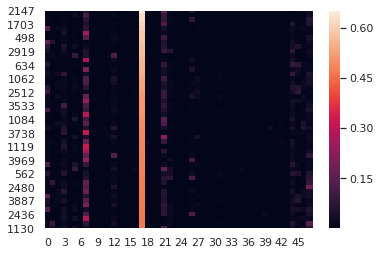

In [11]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

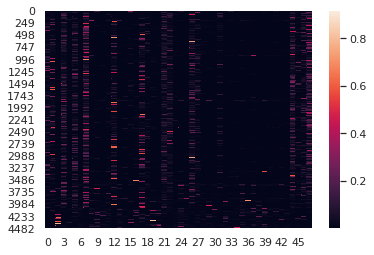

In [12]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [13]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [14]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

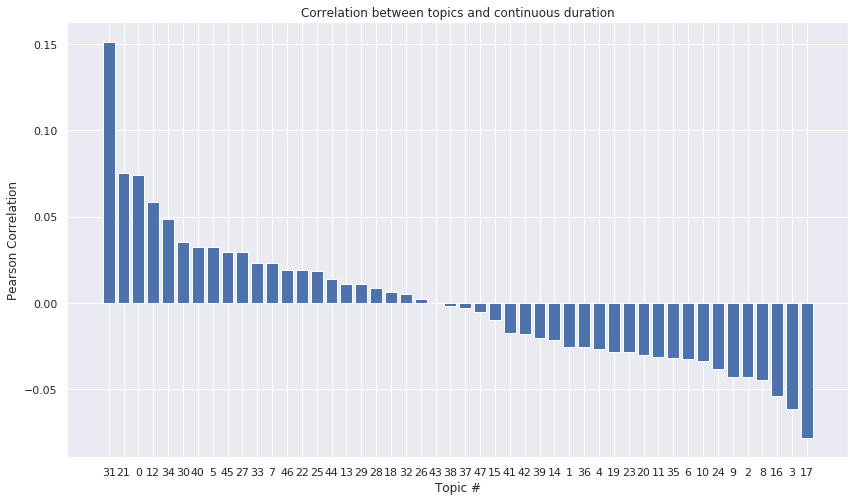

In [15]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [16]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [17]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [18]:
top_neg

[17, 3, 16]

In [19]:
top_topics = top_pos + top_neg
top_topics

[31, 21, 0, 17, 3, 16]

## Extract top words in those top topics

In [20]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/data_JCVB0_nmar_K50_iter1000_phi_normalized.csv', header=None)

In [21]:
phis_df.columns = ['PLACE_HOLD', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [22]:
phis_df.head()

,PLACE_HOLD,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,6.227000e-06,8.190800e-07,1.642660e-06,1.565500e-06,1.947860e-07,1.402910e-05,9.500110e-07,6.337020e-07,...,2.210210e-05,4.806440e-05,2.523380e-07,3.667550e-07,9.022500e-07,6.062650e-07,7.473740e-05,9.717530e-07,1.129810e-06,4.267790e-05
1,1,1,4.216700e-07,6.282880e-07,8.920000e-04,6.227720e-07,2.269270e-05,2.478860e-05,3.047540e-05,5.744630e-07,...,8.705140e-04,5.576730e-07,2.171270e-07,3.432570e-07,5.305200e-07,5.251830e-07,3.578520e-06,5.573500e-07,3.809600e-05,2.229480e-07
2,1,2,5.209370e-08,9.874610e-08,3.870830e-05,3.463720e-08,2.714170e-08,2.662010e-08,7.510970e-08,2.987910e-08,...,3.244300e-08,3.611700e-08,3.340010e-08,3.647870e-08,5.485930e-08,7.637390e-08,3.475910e-08,8.532920e-08,5.613010e-08,3.573830e-08
3,1,3,2.922080e-07,2.524410e-07,1.691440e-06,7.140430e-08,8.152900e-08,5.738040e-08,1.497230e-07,5.723820e-08,...,6.535750e-08,7.697470e-08,6.721550e-08,1.730820e-07,1.108120e-07,1.522560e-07,8.205830e-08,4.454530e-07,8.195960e-08,4.443170e-08
4,1,4,3.382800e-08,6.838750e-08,2.612960e-08,2.795600e-08,1.880380e-08,1.714540e-08,5.171580e-08,2.648990e-08,...,2.237400e-05,2.502380e-08,2.321070e-08,2.535900e-08,3.994570e-08,5.212230e-08,2.138670e-08,4.348760e-08,2.894190e-08,1.385950e-08


In [23]:
cols = ['WORD_ID'] + [str(value) for value in top_topics]

In [24]:
top_phis_df = phis_df[cols]

In [25]:
top_phis_df.head()

,WORD_ID,31,21,0,17,3,16
0,0,4.315510e-07,8.646460e-07,6.227000e-06,3.682990e-07,1.565500e-06,8.437180e-07
1,1,6.125380e-04,7.934250e-07,4.216700e-07,2.111250e-07,6.227720e-07,7.757760e-07
2,2,3.263720e-08,4.076160e-08,5.209370e-08,3.393250e-08,3.463720e-08,6.230420e-08
3,3,6.563210e-08,8.267160e-08,2.922080e-07,6.680470e-08,7.140430e-08,1.197910e-07
4,4,2.260760e-08,3.615220e-08,3.382800e-08,2.309350e-08,2.795600e-08,4.166540e-08


In [26]:
top_phis_df.sort_values(by='17', ascending=False)

,WORD_ID,31,21,0,17,3,16
9779,9779,1.964560e-02,7.643000e-03,1.099710e-02,1.454020e-02,1.237580e-06,5.363010e-03
8954,8954,1.168990e-04,3.264390e-04,5.353400e-07,1.423080e-02,6.451830e-07,8.408680e-04
8596,8596,1.849130e-07,2.584770e-07,2.453400e-07,1.064390e-02,2.586800e-07,1.228930e-04
2820,2820,5.546130e-07,9.757250e-08,1.192110e-07,9.863150e-03,8.496850e-08,6.757890e-05
12638,12638,4.840290e-03,1.119940e-02,1.674060e-02,9.031820e-03,2.419160e-02,1.351940e-02
...,...,...,...,...,...,...,...
4328,4328,1.214510e-08,1.516220e-08,1.814250e-08,1.237790e-08,1.279040e-08,2.208060e-08
2803,2803,1.159540e-08,1.451980e-08,1.729010e-08,1.181730e-08,1.221020e-08,2.107460e-08
15980,15980,1.106120e-08,1.380860e-08,1.649390e-08,1.127390e-08,1.164860e-08,2.010500e-08
5558,5558,1.079530e-08,1.423410e-08,1.596340e-08,1.091260e-08,1.126520e-08,1.944220e-08


In [27]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/vocab.txt', header=None)

In [28]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [29]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aacute,2
3,aado,3
4,aai,4


In [30]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)

In [31]:
word_topic_matrix = top_phis_df.iloc[[word_id for word_id in top_words]]

In [32]:
word_topic_matrix.head()

,WORD_ID,31,21,0,17,3,16
9779,9779,0.019646,0.007643,0.010997,0.014540,0.000001,0.005363
1211,1211,0.013082,0.004459,0.006145,0.006472,0.000002,0.004206
11980,11980,0.012307,0.007564,0.003579,0.008759,0.003584,0.007156
11893,11893,0.011567,0.005494,0.007250,0.006854,0.001775,0.006755
11250,11250,0.010630,0.002306,0.002455,0.002880,0.000770,0.004468


In [33]:
yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in top_words]
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

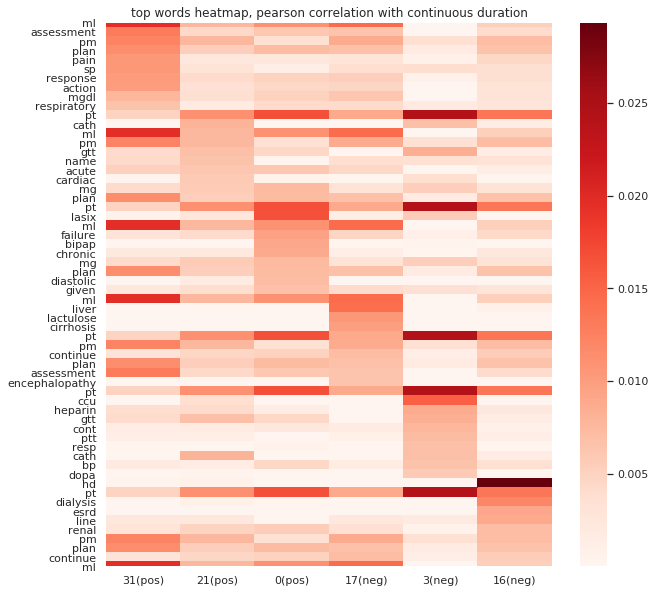

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with continuous duration')

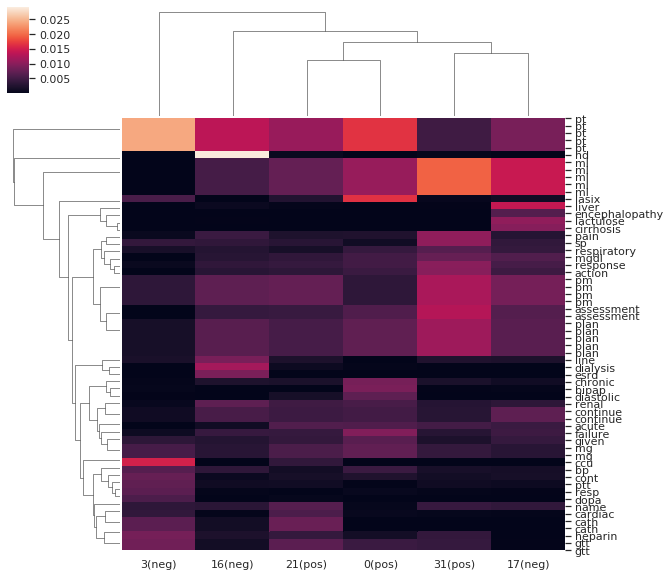

In [35]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels)

## Binary duration
Threshold at 7 day

In [36]:
binary_duration = (duration > 7 * 24).astype(int)

In [37]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [38]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

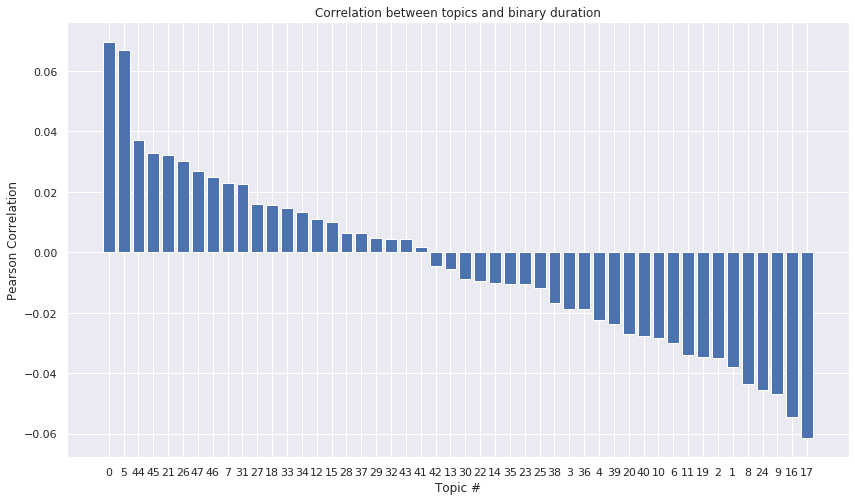

In [39]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [40]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [41]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [42]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[0, 5, 44, 17, 16, 9]

## Extract top words in those top topics

In [43]:
bi_cols = ['WORD_ID'] + [str(value) for value in bi_top_topics]

In [44]:
bi_top_phis_df = phis_df[bi_cols]

In [45]:
bi_top_phis_df.head()

,WORD_ID,0,5,44,17,16,9
0,0,6.227000e-06,1.402910e-05,9.022500e-07,3.682990e-07,8.437180e-07,3.969080e-07
1,1,4.216700e-07,2.478860e-05,5.305200e-07,2.111250e-07,7.757760e-07,1.041360e-06
2,2,5.209370e-08,2.662010e-08,5.485930e-08,3.393250e-08,6.230420e-08,2.570350e-08
3,3,2.922080e-07,5.738040e-08,1.108120e-07,6.680470e-08,1.197910e-07,5.494440e-08
4,4,3.382800e-08,1.714540e-08,3.994570e-08,2.309350e-08,4.166540e-08,1.723250e-08


In [46]:
bi_top_phis_df.sort_values(by='0', ascending=False)

,WORD_ID,0,5,44,17,16,9
12638,12638,1.674060e-02,3.347590e-02,1.259440e-02,9.031820e-03,1.351940e-02,2.045900e-02
8637,8637,1.662460e-02,1.065840e-03,3.716490e-04,1.332700e-03,1.354410e-06,5.262910e-04
9779,9779,1.099710e-02,1.206020e-06,4.056100e-03,1.454020e-02,5.363010e-03,1.107990e-06
5797,5797,9.690820e-03,1.531210e-04,1.197240e-02,4.724230e-03,4.279970e-03,1.644100e-06
1781,1781,9.085530e-03,3.143980e-07,6.340390e-05,2.681640e-04,1.548840e-06,1.741170e-07
...,...,...,...,...,...,...,...
4328,4328,1.814250e-08,9.228170e-09,2.041500e-08,1.237790e-08,2.208060e-08,8.404730e-09
2803,2803,1.729010e-08,8.790090e-09,1.956500e-08,1.181730e-08,2.107460e-08,8.018250e-09
15980,15980,1.649390e-08,8.376270e-09,1.853160e-08,1.127390e-08,2.010500e-08,7.648850e-09
5558,5558,1.596340e-08,8.070490e-09,1.787940e-08,1.091260e-08,1.944220e-08,7.398290e-09


In [47]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/vocab.txt', header=None)

In [48]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [49]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aacute,2
3,aado,3
4,aai,4


In [50]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)

In [51]:
bi_word_topic_matrix = bi_top_phis_df.iloc[[word_id for word_id in bi_top_words]]

In [52]:
bi_word_topic_matrix.head()

,WORD_ID,0,5,44,17,16,9
12638,12638,0.016741,3.347590e-02,0.012594,0.009032,0.013519,2.045900e-02
8637,8637,0.016625,1.065840e-03,0.000372,0.001333,0.000001,5.262910e-04
9779,9779,0.010997,1.206020e-06,0.004056,0.014540,0.005363,1.107990e-06
5797,5797,0.009691,1.531210e-04,0.011972,0.004724,0.004280,1.644100e-06
1781,1781,0.009086,3.143980e-07,0.000063,0.000268,0.000002,1.741170e-07


In [53]:
vocab_df.shape

(18407, 2)

In [54]:
bi_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_top_words]
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

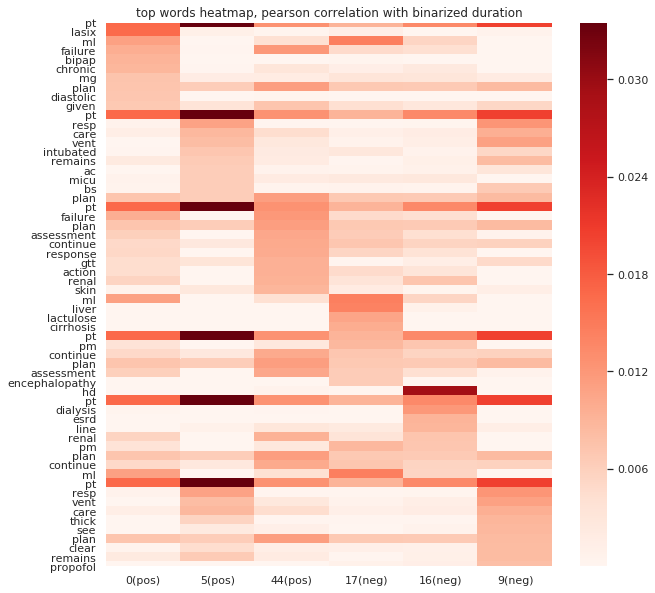

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with binarized duration')

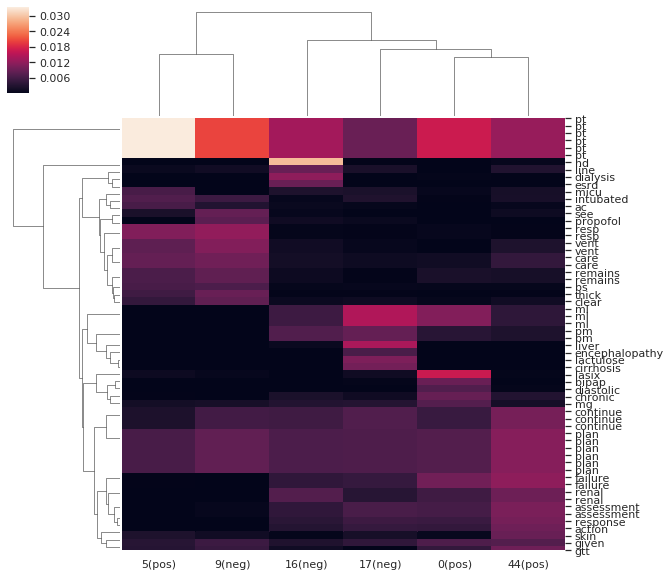

In [56]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [57]:
def inner_prod(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [58]:
cos = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method=inner_prod))

In [59]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

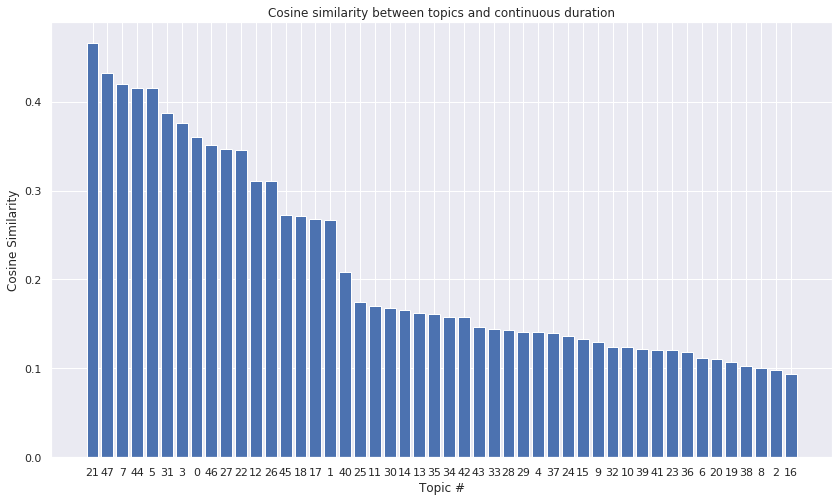

In [60]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [61]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [62]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [63]:
cos_cols = ['WORD_ID'] + [str(value) for value in cos_top_topics]

In [64]:
cos_top_phis_df = phis_df[cos_cols]

In [65]:
cos_top_phis_df.head()

,WORD_ID,21,47,7,44,5,31
0,0,8.646460e-07,9.717530e-07,6.337020e-07,9.022500e-07,1.402910e-05,4.315510e-07
1,1,7.934250e-07,5.573500e-07,5.744630e-07,5.305200e-07,2.478860e-05,6.125380e-04
2,2,4.076160e-08,8.532920e-08,2.987910e-08,5.485930e-08,2.662010e-08,3.263720e-08
3,3,8.267160e-08,4.454530e-07,5.723820e-08,1.108120e-07,5.738040e-08,6.563210e-08
4,4,3.615220e-08,4.348760e-08,2.648990e-08,3.994570e-08,1.714540e-08,2.260760e-08


In [66]:
cos_top_phis_df.sort_values(by='21', ascending=False)

,WORD_ID,21,47,7,44,5,31
12638,12638,1.119940e-02,1.736150e-02,3.019060e-02,1.259440e-02,3.347590e-02,4.840290e-03
2476,2476,7.986150e-03,3.521560e-04,1.023300e-04,6.469470e-04,1.173420e-03,6.148770e-07
9779,9779,7.643000e-03,2.772110e-06,2.093880e-06,4.056100e-03,1.206020e-06,1.964560e-02
11980,11980,7.564040e-03,1.211950e-03,2.463690e-05,2.716800e-03,8.812870e-06,1.230690e-02
6829,6829,6.985790e-03,8.675770e-04,2.047670e-02,9.468170e-03,3.273480e-03,4.191160e-03
...,...,...,...,...,...,...,...
4328,4328,1.516220e-08,2.319690e-08,1.005390e-08,2.041500e-08,9.228170e-09,1.214510e-08
2803,2803,1.451980e-08,2.213650e-08,9.601020e-09,1.956500e-08,8.790090e-09,1.159540e-08
5558,5558,1.423410e-08,2.041800e-08,8.890280e-09,1.787940e-08,8.070490e-09,1.079530e-08
15980,15980,1.380860e-08,2.111770e-08,9.126960e-09,1.853160e-08,8.376270e-09,1.106120e-08


In [67]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)

In [68]:
cos_word_topic_matrix = cos_top_phis_df.iloc[[word_id for word_id in cos_top_words]]

In [69]:
cos_word_topic_matrix.head()

,WORD_ID,21,47,7,44,5,31
12638,12638,0.011199,0.017362,0.030191,0.012594,0.033476,4.840290e-03
2476,2476,0.007986,0.000352,0.000102,0.000647,0.001173,6.148770e-07
9779,9779,0.007643,0.000003,0.000002,0.004056,0.000001,1.964560e-02
11980,11980,0.007564,0.001212,0.000025,0.002717,0.000009,1.230690e-02
6829,6829,0.006986,0.000868,0.020477,0.009468,0.003273,4.191160e-03


In [70]:
cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in cos_top_words]
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

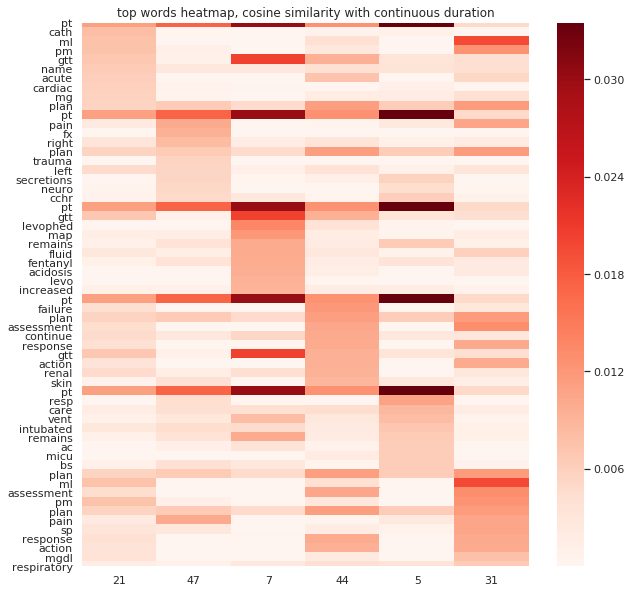

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with continuous duration')

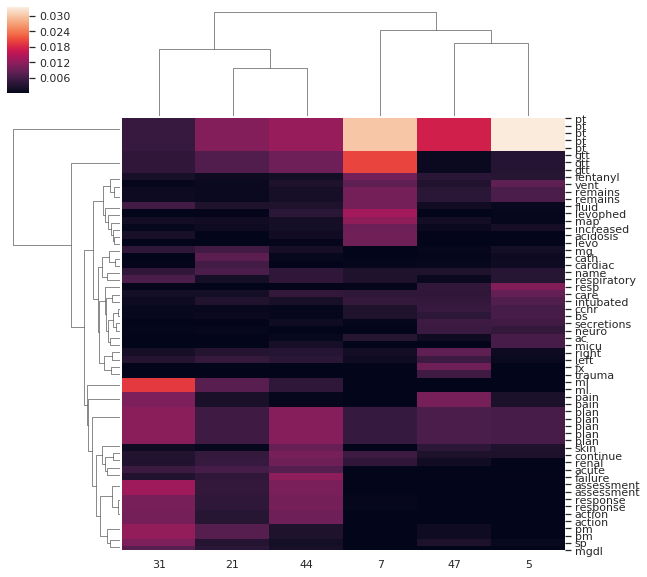

In [72]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [73]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=inner_prod))

In [74]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

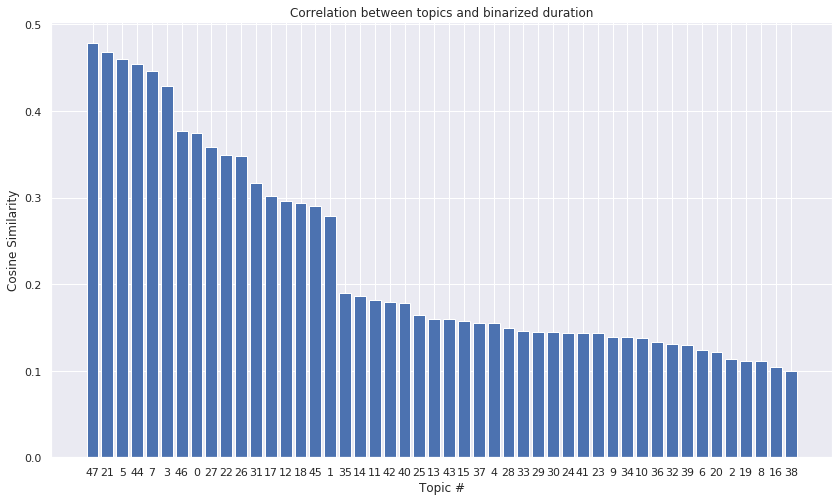

In [75]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [76]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [77]:
bi_cos_cols = ['WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [78]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [79]:
bi_cos_top_phis_df.head()

,WORD_ID,47,21,5,44,7,3
0,0,9.717530e-07,8.646460e-07,1.402910e-05,9.022500e-07,6.337020e-07,1.565500e-06
1,1,5.573500e-07,7.934250e-07,2.478860e-05,5.305200e-07,5.744630e-07,6.227720e-07
2,2,8.532920e-08,4.076160e-08,2.662010e-08,5.485930e-08,2.987910e-08,3.463720e-08
3,3,4.454530e-07,8.267160e-08,5.738040e-08,1.108120e-07,5.723820e-08,7.140430e-08
4,4,4.348760e-08,3.615220e-08,1.714540e-08,3.994570e-08,2.648990e-08,2.795600e-08


In [80]:
# bi_cos_top_phis_df.sort_values(by='21', ascending=False)

In [81]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)

In [82]:
bi_cos_word_topic_matrix = bi_cos_top_phis_df.iloc[[word_id for word_id in bi_cos_top_words]]

In [83]:
bi_cos_word_topic_matrix.head()

,WORD_ID,47,21,5,44,7,3
12638,12638,0.017362,0.011199,3.347590e-02,1.259440e-02,3.019060e-02,0.024192
11250,11250,0.010099,0.002306,2.367720e-03,4.746630e-04,1.016410e-05,0.000770
6451,6451,0.009440,0.000115,3.372700e-07,4.434050e-07,4.079120e-07,0.000283
13880,13880,0.008339,0.003210,1.101010e-03,3.390760e-03,1.607170e-03,0.001729
11893,11893,0.006623,0.005494,6.303690e-03,1.127150e-02,4.723870e-03,0.001775


In [84]:
bi_cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_cos_top_words]
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

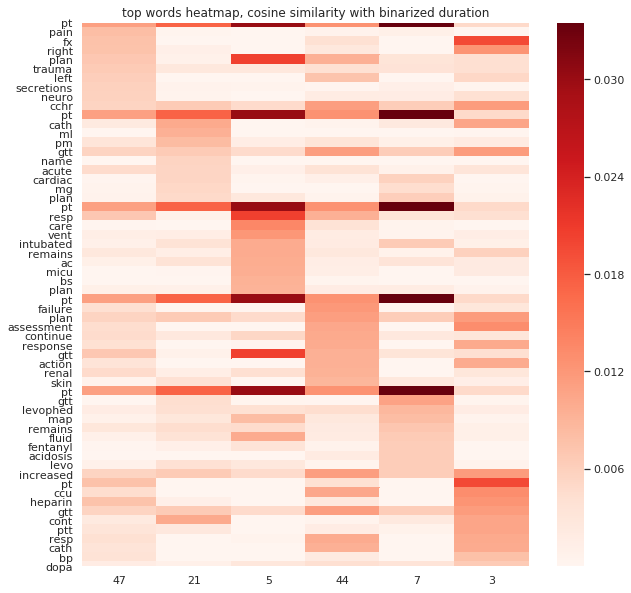

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with binarized duration')

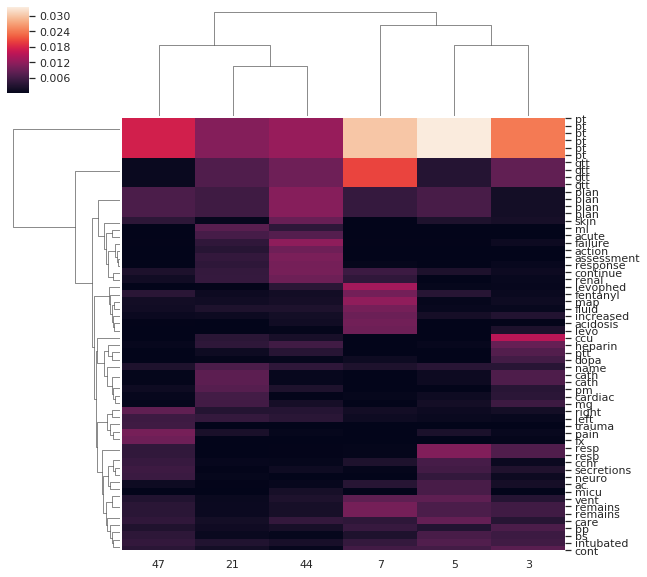

In [86]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)